In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/dataset/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/dataset/test'    # Update with your actual path

In [5]:
import os
print(len(os.listdir('/content/drive/MyDrive/dataset/train/African')))
print(len(os.listdir('/content/drive/MyDrive/dataset/train/Asian')))
print(len(os.listdir('/content/drive/MyDrive/dataset/test/African')))
print(len(os.listdir('/content/drive/MyDrive/dataset/test/Asian')))

420
420
97
91


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 672 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [7]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [9]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [10]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
21/21 [==============================] - 229s 11s/step - loss: 3.2364 - accuracy: 0.5030 - val_loss: 1.3101 - val_accuracy: 0.5000
Epoch 2/3
21/21 [==============================] - 218s 11s/step - loss: 0.8243 - accuracy: 0.5179 - val_loss: 0.7299 - val_accuracy: 0.4881
Epoch 3/3
21/21 [==============================] - 210s 10s/step - loss: 0.7157 - accuracy: 0.5580 - val_loss: 0.7063 - val_accuracy: 0.5238


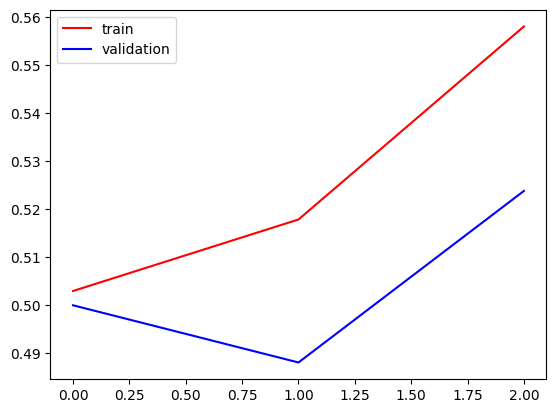

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

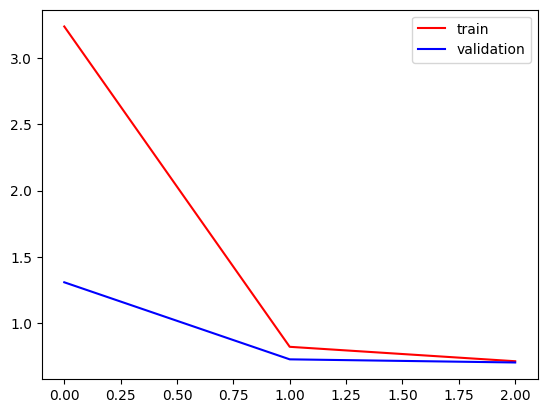

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


In [14]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

6/6 [==============================] - 62s 10s/step
[[0.5196351 ]
 [0.6246938 ]
 [0.5129676 ]
 [0.4054998 ]
 [0.49850994]
 [0.61770016]
 [0.45530412]
 [0.5245716 ]
 [0.42068726]
 [0.6172059 ]
 [0.55270267]
 [0.4402386 ]
 [0.561027  ]
 [0.6446955 ]
 [0.6413131 ]
 [0.48799998]
 [0.4113374 ]
 [0.3665191 ]
 [0.47068927]
 [0.4675407 ]
 [0.61227447]
 [0.50661606]
 [0.42824095]
 [0.51363206]
 [0.5822538 ]
 [0.5127487 ]
 [0.47015482]
 [0.58436924]
 [0.4360815 ]
 [0.5180685 ]
 [0.6172672 ]
 [0.5016351 ]
 [0.5851947 ]
 [0.50775176]
 [0.4735275 ]
 [0.588496  ]
 [0.44088602]
 [0.44819298]
 [0.61410254]
 [0.45190683]
 [0.549593  ]
 [0.49383563]
 [0.4633241 ]
 [0.5709696 ]
 [0.4122844 ]
 [0.5491798 ]
 [0.4799773 ]
 [0.47726914]
 [0.50890607]
 [0.5331798 ]
 [0.5564142 ]
 [0.46391192]
 [0.5726661 ]
 [0.553429  ]
 [0.55982214]
 [0.5826955 ]
 [0.57559884]
 [0.5714231 ]
 [0.4306928 ]
 [0.44263455]
 [0.54946786]
 [0.5071083 ]
 [0.48648122]
 [0.5322987 ]
 [0.4640621 ]
 [0.5210448 ]
 [0.5670632 ]
 [0.613590

In [15]:
len(predictions)

188

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[36 61]
 [29 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.37      0.44        97
           1       0.50      0.68      0.58        91

    accuracy                           0.52       188
   macro avg       0.53      0.53      0.51       188
weighted avg       0.53      0.52      0.51       188

